# Importing the necessary libraries

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importing the dataset

In [285]:
dataset = pd.read_csv("C:\\Users\\Chandu\\Desktop\\Datasets\\Social_Network_Ads.csv")

# Observing the Dataset

In [286]:
#observe the dataset

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,Male,42,121315,0
1,17782313,Male,53,67214,0
2,14603818,Female,59,111005,0
3,18188198,Female,39,53414,0
4,19357305,Male,39,114285,0


This dataset gives us the information about the details about the users who have purchased a product or not.
By using the logistic regression, let's predict whether the user has purchased or not based on the user details.

# Preprocessing the Dataset

In [287]:
#Getting the basic information of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Only 'Gender' is of object type

In [288]:
#Let's seperately check for only null values

dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

This tells us that none of the columns in the dataset has null values.

In [289]:
#Let's see the unique values of the 'Gender' column

dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [290]:
#Let's encode the 'Gender' column values

Label = LabelEncoder()
dataset['Gender']= Label.fit_transform(dataset['Gender'])
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,11021175,1,42,121315,0
1,17782313,1,53,67214,0
2,14603818,0,59,111005,0
3,18188198,0,39,53414,0
4,19357305,1,39,114285,0


In [291]:
#Let's see the encoded values of the 'Gender' column

dataset['Gender'].unique()

array([1, 0])

# Visualizing the Data

array([[<AxesSubplot:title={'center':'User ID'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>],
       [<AxesSubplot:title={'center':'Purchased'}>, <AxesSubplot:>]],
      dtype=object)

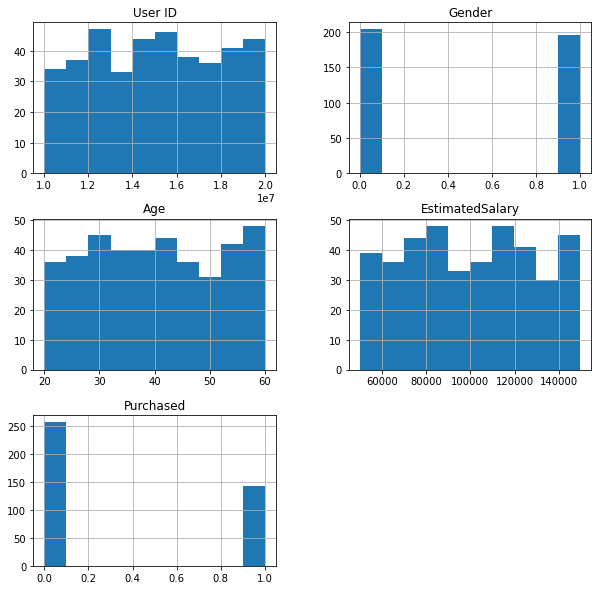

In [292]:
#Lets draw histogram graphs 
f
dataset.hist(figsize=(10,10),bins=10)

It shows that female has purchased more than the male

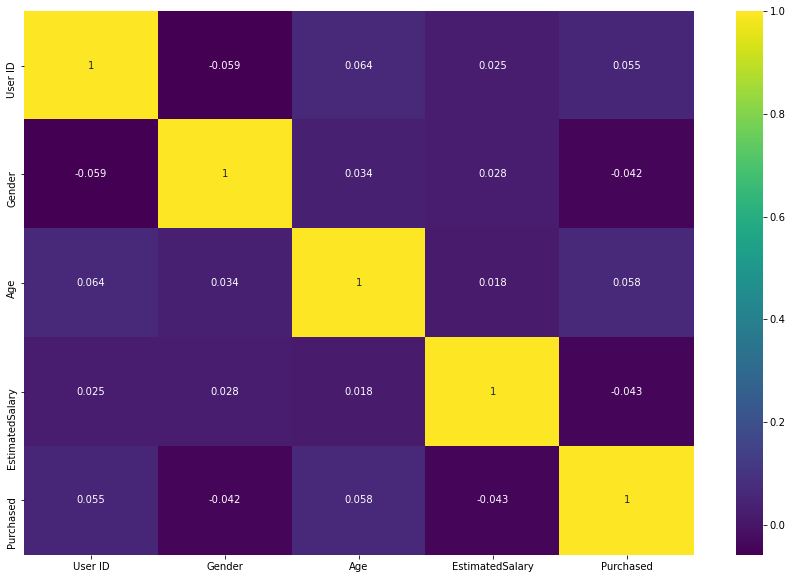

In [293]:
#checking the correlation
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot= True,cmap = 'viridis')
plt.show()

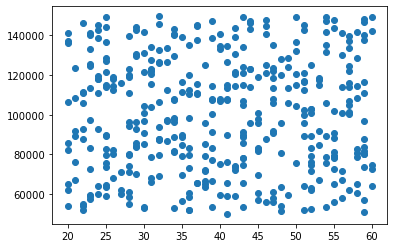

In [294]:
plt.scatter(dataset['Age'],dataset['EstimatedSalary'])

# Dividing into input and output

Let's take all the values except the first two and last column as our input values(independent variables) and the last column as our output(dependent variable).

In [295]:
x= dataset.iloc [:,2:4].values
print (x) 

[[    42 121315]
 [    53  67214]
 [    59 111005]
 [    39  53414]
 [    39 114285]
 [    39 107458]
 [    20  85582]
 [    59 148335]
 [    48  80579]
 [    42 114204]
 [    32  87786]
 [    49 113544]
 [    55  88300]
 [    54 147066]
 [    57 139622]
 [    41 134716]
 [    51 116333]
 [    55  72567]
 [    44 123254]
 [    47 113548]
 [    52  79343]
 [    20 106149]
 [    40  59674]
 [    52  76333]
 [    28 118742]
 [    22 105897]
 [    25 114815]
 [    38  85428]
 [    57 114005]
 [    57 133402]
 [    43 106726]
 [    35  84550]
 [    34  96296]
 [    32  68964]
 [    55  90946]
 [    48  51787]
 [    22  53940]
 [    42 138928]
 [    59 116474]
 [    23  97284]
 [    40 132951]
 [    24 119308]
 [    50 120675]
 [    41 113547]
 [    52 102686]
 [    34 140262]
 [    20  54075]
 [    25  63715]
 [    46  56058]
 [    58  65052]
 [    38  72107]
 [    21 108656]
 [    42 120639]
 [    31  68033]
 [    26  80283]
 [    47  60952]
 [    31 123137]
 [    36  98529]
 [    25 12130

In [296]:
y = dataset.iloc[:,4].values
print (y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


# Feature Scaling – Standardization (To standardize Salary)

In [297]:
sc_x= StandardScaler()
x = sc_x.fit_transform(x)
print (x)


[[ 0.17951354  0.76103154]
 [ 1.11315372 -1.14804259]
 [ 1.622412    0.39722026]
 [-0.0751156  -1.63500628]
 [-0.0751156   0.51296235]
 [-0.0751156   0.27205647]
 [-1.68776681 -0.49988685]
 [ 1.622412    1.71449234]
 [ 0.68877182 -0.67642883]
 [ 0.17951354  0.51010409]
 [-0.66925025 -0.42211381]
 [ 0.7736482   0.48681452]
 [ 1.28290648 -0.40397617]
 [ 1.1980301   1.66971285]
 [ 1.45265924  1.40703476]
 [ 0.09463716  1.23391563]
 [ 0.94340096  0.58523059]
 [ 1.28290648 -0.95915007]
 [ 0.3492663   0.82945347]
 [ 0.60389544  0.48695567]
 [ 1.02827734 -0.72004384]
 [-1.68776681  0.2258655 ]
 [ 0.00976078 -1.41410826]
 [ 1.02827734 -0.82625839]
 [-1.00875577  0.67023751]
 [-1.51801405  0.21697311]
 [-1.26338491  0.53166458]
 [-0.15999198 -0.50532108]
 [ 1.45265924  0.50308193]
 [ 1.45265924  1.18754822]
 [ 0.26438992  0.24622622]
 [-0.41462111 -0.53630326]
 [-0.49949749 -0.12181953]
 [-0.66925025 -1.08628994]
 [ 1.28290648 -0.31060618]
 [ 0.68877182 -1.6924186 ]
 [-1.51801405 -1.6164452 ]
 

In [298]:
x.shape, y.shape

((400, 2), (400,))

# Dividing the dataset into Train and Test parts

In [299]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [300]:
x_train.shape

(320, 2)

In [301]:
x_test.shape

(80, 2)

In [302]:
y_test.shape

(80,)

In [303]:
y_train.shape

(320,)

# Running a Regressor

In [304]:
lr=  LogisticRegression()

# Fitting the model

In [305]:
lr = lr.fit (x_train, y_train)


# Predicting the output

In [306]:
lr.predict_proba(x_test)

array([[0.58370754, 0.41629246],
       [0.68313456, 0.31686544],
       [0.61541189, 0.38458811],
       [0.64809128, 0.35190872],
       [0.63479415, 0.36520585],
       [0.62550246, 0.37449754],
       [0.63602875, 0.36397125],
       [0.63651445, 0.36348555],
       [0.61124966, 0.38875034],
       [0.61285527, 0.38714473],
       [0.61915131, 0.38084869],
       [0.64101582, 0.35898418],
       [0.62000714, 0.37999286],
       [0.58043578, 0.41956422],
       [0.66654734, 0.33345266],
       [0.6345749 , 0.3654251 ],
       [0.60820971, 0.39179029],
       [0.69109391, 0.30890609],
       [0.58407111, 0.41592889],
       [0.65277846, 0.34722154],
       [0.66056613, 0.33943387],
       [0.60748769, 0.39251231],
       [0.63625586, 0.36374414],
       [0.63927096, 0.36072904],
       [0.66519621, 0.33480379],
       [0.63179879, 0.36820121],
       [0.60638535, 0.39361465],
       [0.67026401, 0.32973599],
       [0.60336499, 0.39663501],
       [0.60568178, 0.39431822],
       [0.

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

In [307]:
y_pred = lr.predict (x_test)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [308]:
y_pred_x = lr.predict (x)
y_pred_x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Evaluating the Accuracy score of the model

In [309]:
accuracy_score (y_test,y_pred)*100

70.0

In [310]:
accuracy_score (y,y_pred_x)*100

64.25

In [311]:
cm = confusion_matrix (y_test,y_pred)
print (cm)

[[56  0]
 [24  0]]


True negatives: 56
False negatives: 24
False positives: 0
True positives: 0

In [322]:
((56+0)/80)*100

70.0

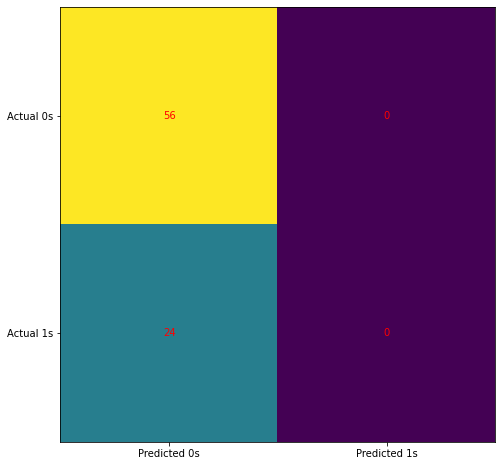

In [313]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Estimating the model

Equation of the straight line: y = mx+c

y = m1x1+m2x2+m3x3+....m6 x6+c

In [314]:
#Let's see the intercept value

lr.intercept_

array([-0.52561775])

In [315]:
#Let's see the coefficient value:slopes

lr.coef_

array([[ 0.10242756, -0.07581388]])

In [316]:
y_test[0]

1

In [317]:
y_pred[0]

0

In [318]:
x_test[0]

array([ 1.1980301 , -0.85597023])

In [319]:
#y=m1x1 + m2x2 +c
#c = m1x1-m2x2-y

yval = 0.14582226*(1.11315372)+(-0.10291998*(-0.52829306))+(-0.55727653)
c = 0.14582226*(1.11315372)+(-0.10291998*(-0.52829306))-0

In [320]:
yval

-0.340582027652854

In [321]:
c

0.216694502347146